In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from scipy.linalg import toeplitz

In [138]:
data = pd.read_excel('Input (1).xlsx',  sheet_name='Russia', header=0, na_values='')
data = pd.melt(data, id_vars=['Date', 'Variable'], var_name='RIC', value_name='value')
data = data.pivot_table('value', ['Date', 'RIC'], 'Variable')
data = data.reset_index()
data

Variable,Date,RIC,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,Operating Profit,P_endyear,P_nextjune,ROA,ROE,ROIC,Revenue,Total Assets,"Total Assets Growth, %"
0,2010,AFKS.MM,0.732,"6,793,210,000.000","4,790,722,595.712",0.045,"29,821,053,168.229","477,421,889,372.000","8,604,675,172.533","1,719,225,746.165","4,432,129,558.543",0.892,1.117,6.763,28.347,12.252,"19,614,434,836.891","42,011,040,000.000",0.051
1,2010,AFLT.MM,1.095,"1,127,600,000.000","677,680,132.618",0.280,"4,102,450,116.021","93,796,201,601.000","2,907,075,677.683","276,555,477.071","477,912,500.065",2.618,2.480,5.934,26.567,28.149,"4,290,682,730.178","4,525,900,000.000",0.136
2,2010,AKRN.MM,29.191,"1,270,985,615.783","225,688,693.874",5.422,"2,178,683,857.346","18,968,000,000.000","1,772,736,629.308","233,626,142.325","177,310,877.239",37.174,47.792,9.808,23.260,11.917,"1,238,549,470.489","2,802,011,810.894",0.145
3,2010,AMEZ.MM,0.825,"411,049,256.046","35,968,064.399",0.076,"175,896,790.043","883,806,000.000","283,323,252.108","37,738,840.685","41,329,583.320",0.568,0.487,6.607,9.623,8.141,"336,694,335.390","596,394,246.313",-0.012
4,2010,APTK.MM,6.765,"64,267,097.753","34,789,350.401",-1.112,"348,813,467.058","8,460,000,000.000","320,321,473.332","-11,857,081.588","29,035,663.620",3.372,3.202,0.148,-32.369,-1.559,"694,846,755.303","550,460,228.960",0.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,2019,URKA.MM,1.652,"2,097,285,005.758","1,629,900,951.403",1.014,nan,"133,410,000,000.000","7,820,300,661.779","1,263,778,058.790","1,314,489,390.188",1.848,1.717,13.815,85.552,19.521,"2,910,846,572.382","9,200,311,374.035",0.138
576,2019,UTAR.MM,-0.125,"-452,737,169.920","157,756,673.364",-0.082,"1,658,593,702.067","47,831,973,000.000","422,259,676.384","-314,682,405.281","63,363,762.916",0.114,0.100,-28.241,nan,nan,"1,199,973,737.084","1,122,263,777.268",-0.166
577,2019,VLHZ.MM,1.042,"5,215,025.832","911,280.138",-0.059,"11,813,280.425","251,375,000.000","4,481,763.555","-294,015.499","610,318.599",0.895,0.684,-1.726,-5.313,nan,"33,532,448.335","16,264,222.158",-0.244
578,2019,VSMO.MM,224.653,"2,588,851,262.916","611,279,965.557",20.868,"3,277,431,084.960","30,451,094,000.000","3,783,225,562.134","222,007,103.904","380,091,834.099",328.133,262.793,4.870,8.750,8.244,"1,455,254,936.854","4,774,081,946.039",0.155


In [139]:
# удаление пропусков

delete = pd.DataFrame()

for i in range(len(data)):
    if (math.isnan(data['Market Cap'][i]) or
        # data['Market Cap'][i] <= 5000000 or
        # math.isnan(data['Revenue'][i]) or
        math.isnan(data['Common Shareholder Equity'][i]) or
        math.isnan(data['Net Income'][i]) or
        math.isnan(data['Total Assets Growth, %'][i])):
        delete = delete.append(data.take([i]))
                               
delete = pd.unique(delete['RIC'])
delete = pd.DataFrame(delete)
delete = delete.rename(columns={0: 'RIC'})

data = pd.merge(data, delete, how='outer', on='RIC', indicator=True)
data = data[data['_merge'] == 'left_only']
del data['_merge']
data = data.reset_index()
del data['index']
data

,Date,RIC,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,Operating Profit,P_endyear,P_nextjune,ROA,ROE,ROIC,Revenue,Total Assets,"Total Assets Growth, %"
0,2010,AFKS.MM,0.732,"6,793,210,000.000","4,790,722,595.712",0.045,"29,821,053,168.229","477,421,889,372.000","8,604,675,172.533","1,719,225,746.165","4,432,129,558.543",0.892,1.117,6.763,28.347,12.252,"19,614,434,836.891","42,011,040,000.000",0.051
1,2011,AFKS.MM,0.907,"8,420,065,000.000","6,863,366,966.461",0.053,"30,619,030,486.979","576,837,938,680.000","7,044,014,412.623","912,610,226.711","4,274,136,090.148",0.730,0.768,4.157,7.827,8.319,"26,633,682,172.282","44,166,048,000.000",-0.006
2,2012,AFKS.MM,0.867,"8,038,755,000.000","7,483,016,481.331",0.051,"29,003,937,707.492","633,661,301,086.000","8,103,766,933.741","199,054,136.174","3,599,524,098.279",0.840,0.858,2.052,-0.057,4.905,"30,077,786,518.730","43,916,497,000.000",0.017
3,2013,AFKS.MM,0.987,"9,172,189,000.000","8,646,664,645.794",0.256,"25,898,019,234.773","320,843,387,385.000","13,178,478,890.413","961,666,028.312","4,803,350,739.121",1.366,1.342,5.759,21.450,5.246,"34,507,567,949.235","44,642,188,000.000",-0.031
4,2014,AFKS.MM,1.115,"10,306,701,000.000","5,484,188,622.599",0.040,"25,784,502,591.973","319,349,000,000.000","1,989,690,721.649","2,186,729,547.005","3,454,720,550.076",0.206,0.359,3.839,7.378,8.936,"17,921,743,286.470","43,248,994,000.000",-0.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2015,VLHZ.MM,1.112,"5,568,556.515","457,267.387",-0.179,"19,335,070.891","299,958,000.000","8,889,796.378","-895,153.927","-264,268.610",1.776,1.992,-4.497,-14.386,nan,"40,443,726.635","19,840,353.507",-0.437
486,2016,VLHZ.MM,1.058,"5,293,853.967","2,606,035.682",0.162,"14,512,989.123","289,423,000.000","9,168,063.445","809,642.287","2,121,878.834",1.804,1.349,5.281,16.651,13.963,"33,910,540.854","14,876,044.387",-0.250
487,2017,VLHZ.MM,1.314,"6,577,020.388","2,750,289.734",0.206,"17,527,935.377","277,579,000.000","7,813,457.920","1,033,494.932","2,466,349.999",1.561,1.370,5.631,16.047,14.319,"40,758,875.667","18,994,319.573",0.277
488,2018,VLHZ.MM,1.413,"7,074,326.844","2,465,542.210",0.166,"16,338,410.441","183,927,000.000","4,160,744.341","829,709.925","2,146,936.652",0.831,0.848,3.980,11.800,10.147,"45,629,952.738","21,507,921.779",0.132


In [140]:
data.dtypes

Date                           int64
RIC                           object
BPS                          float64
Common Shareholder Equity    float64
EBITDA                       float64
EPS                          float64
EV                           float64
Gross Margin                 float64
Market Cap                   float64
Net Income                   float64
Operating Profit             float64
P_endyear                    float64
P_nextjune                   float64
ROA                          float64
ROE                          float64
ROIC                         float64
Revenue                      float64
Total Assets                 float64
Total Assets Growth, %       float64
dtype: object

In [141]:
data['EV/EBITDA'] = data['EV'] / data['EBITDA']
data['P/E'] = data['P_endyear'] / data['EPS']
data['P/B'] = data['P_endyear'] / data['BPS']
data['BM'] = data['Common Shareholder Equity'] / data['Market Cap']
data['GM/A'] = data['Gross Margin'] / data['Total Assets']
data['Return on Equity'] = data['Net Income'] / data['Common Shareholder Equity']

data.head()

,Date,RIC,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,...,ROIC,Revenue,Total Assets,"Total Assets Growth, %",EV/EBITDA,P/E,P/B,BM,GM/A,Return on Equity
0,2010,AFKS.MM,0.732,"6,793,210,000.000","4,790,722,595.712",0.045,"29,821,053,168.229","477,421,889,372.000","8,604,675,172.533","1,719,225,746.165",...,12.252,"19,614,434,836.891","42,011,040,000.000",0.051,6.225,20.032,1.218,0.789,11.364,0.253
1,2011,AFKS.MM,0.907,"8,420,065,000.000","6,863,366,966.461",0.053,"30,619,030,486.979","576,837,938,680.000","7,044,014,412.623","912,610,226.711",...,8.319,"26,633,682,172.282","44,166,048,000.000",-0.006,4.461,13.802,0.805,1.195,13.061,0.108
2,2012,AFKS.MM,0.867,"8,038,755,000.000","7,483,016,481.331",0.051,"29,003,937,707.492","633,661,301,086.000","8,103,766,933.741","199,054,136.174",...,4.905,"30,077,786,518.730","43,916,497,000.000",0.017,3.876,16.547,0.968,0.992,14.429,0.025
3,2013,AFKS.MM,0.987,"9,172,189,000.000","8,646,664,645.794",0.256,"25,898,019,234.773","320,843,387,385.000","13,178,478,890.413","961,666,028.312",...,5.246,"34,507,567,949.235","44,642,188,000.000",-0.031,2.995,5.332,1.384,0.696,7.187,0.105
4,2014,AFKS.MM,1.115,"10,306,701,000.000","5,484,188,622.599",0.040,"25,784,502,591.973","319,349,000,000.000","1,989,690,721.649","2,186,729,547.005",...,8.936,"17,921,743,286.470","43,248,994,000.000",-0.547,4.702,5.198,0.185,5.180,7.384,0.212


In [142]:
sumstats = data.drop('Date', axis=1)
sumstats = sumstats.describe()
# sumstats.to_excel('Summary statistics China.xlsx')
sumstats

,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,Operating Profit,P_endyear,...,ROIC,Revenue,Total Assets,"Total Assets Growth, %",EV/EBITDA,P/E,P/B,BM,GM/A,Return on Equity
count,490.000,490.000,490.000,490.000,481.000,481.000,490.000,490.000,490.000,490.000,...,378.000,490.000,490.000,490.000,481.000,490.000,490.000,490.000,481.000,490.000
mean,53.807,"9,928,980,384.011","2,658,480,211.768",6.540,"11,875,106,692.691","306,946,646,954.312","8,890,897,032.720","1,329,294,181.057","1,882,035,409.222",44.296,...,12.128,"11,040,049,478.706","18,234,429,274.498",0.066,17.684,7.662,2.334,1.367,13.678,0.161
std,321.500,"32,263,518,737.631","6,958,035,323.600",47.116,"25,579,530,102.083","804,592,264,057.952","18,672,452,491.806","4,339,498,700.996","5,289,113,806.056",220.727,...,23.733,"26,847,213,450.111","51,269,186,844.875",0.422,242.558,101.320,15.252,6.406,11.273,2.027
min,-180.005,"-4,389,125,439.015","-129,894,861.582",-115.829,"-71,051,323.652","-1,650,599,000.000","2,078,368.474","-2,836,188,400.699","-1,063,358,637.491",0.002,...,-309.226,"4,260,769.436","6,956,565.843",-0.827,-108.794,"-1,144.181",-123.045,-12.046,-3.270,-16.185
25%,0.244,"96,416,951.190","43,746,823.917",0.001,"386,191,384.273","2,370,532,000.000","172,519,333.467","494,923.540","19,957,405.764",0.564,...,6.772,"397,293,895.888","691,004,080.235",-0.116,3.599,2.204,0.492,0.262,5.328,0.019
50%,1.350,"724,498,850.715","300,981,606.178",0.216,"1,986,885,275.972","17,528,459,000.000","1,032,073,733.030","78,847,094.037","214,927,786.897",2.537,...,11.652,"1,838,184,130.222","2,548,503,124.864",0.039,5.429,6.289,1.027,0.720,11.961,0.120
75%,7.594,"3,529,342,649.828","2,056,282,426.952",1.028,"11,812,826,639.072","187,360,000,000.000","8,032,900,365.750","674,955,643.802","1,335,750,291.122",10.229,...,17.081,"8,232,882,041.753","11,941,345,329.611",0.164,7.798,12.181,2.367,1.360,19.380,0.224
max,"2,904.241","283,356,339,312.861","59,669,255,140.710",629.775,"192,946,498,527.300","5,496,589,000,000.000","149,899,531,276.894","42,235,012,735.292","51,290,954,836.305","2,421.489",...,59.953,"159,621,921,556.704","408,520,401,337.793",3.932,"5,302.722","1,155.674",257.169,99.778,68.623,27.189


In [143]:
prices = pd.read_excel('Raw_Dataset_3.xlsx',  sheet_name='Russia', header=0)
prices = pd.melt(prices, id_vars='RIC', var_name='Date', value_name='Price_close')

prices.head()

,RIC,Date,Price_close
0,ROSN.MM,2009-05-31,6.708
1,GAZP.MM,2009-05-31,5.786
2,NVTK.MM,2009-05-31,4.604
3,GMKN.MM,2009-05-31,113.047
4,LKOH.MM,2009-05-31,53.309


In [144]:
prices.dtypes

RIC                    object
Date           datetime64[ns]
Price_close           float64
dtype: object

In [145]:
# первая сортировка по капитализации

big = pd.DataFrame()
small = pd.DataFrame()

for i in range(10):
    one_year = data[data['Date']==2010+i]
    median = statistics.median(one_year['Market Cap'])
    big = big.append(one_year[one_year['Market Cap']>=median])
    small = small.append(one_year[one_year['Market Cap']<median])

In [146]:
# вторая сортировка по остальным факторам

# формирование портфелей для Small Cap

SH_BM = pd.DataFrame()
SN_BM = pd.DataFrame()
SL_BM = pd.DataFrame()

SR_P = pd.DataFrame()
SN_P = pd.DataFrame()
SW_P = pd.DataFrame()

SC_I = pd.DataFrame()
SN_I = pd.DataFrame()
SA_I = pd.DataFrame()

for i in range(10):
    one_year = small[small['Date']==2010+i]
    
    quantile_h_BM = one_year['BM'].quantile(0.7)
    quantile_l_BM = one_year['BM'].quantile(0.3)
    
    quantile_h_P = one_year['ROE'].quantile(0.7)
    quantile_l_P = one_year['ROE'].quantile(0.3)
    
    quantile_h_I = one_year['Total Assets Growth, %'].quantile(0.7)
    quantile_l_I = one_year['Total Assets Growth, %'].quantile(0.3)
    
    SH_BM = SH_BM.append(one_year[one_year['BM']>=quantile_h_BM])
    SN_BM = SN_BM.append(one_year[(one_year['BM']<quantile_h_BM) & (one_year['BM']>quantile_l_BM)])
    SL_BM = SL_BM.append(one_year[one_year['BM']<=quantile_l_BM])
    
    SR_P = SR_P.append(one_year[one_year['ROE']>=quantile_h_P])
    SN_P = SN_P.append(one_year[(one_year['ROE']<quantile_h_P) & (one_year['ROE']>quantile_l_P)])
    SW_P = SW_P.append(one_year[one_year['ROE']<=quantile_l_P])
    
    SA_I = SA_I.append(one_year[one_year['Total Assets Growth, %']>=quantile_h_I])
    SN_I = SN_I.append(one_year[(one_year['Total Assets Growth, %']<quantile_h_I) & (one_year['Total Assets Growth, %']>quantile_l_I)])
    SC_I = SC_I.append(one_year[one_year['Total Assets Growth, %']<=quantile_l_I])
    
    
# формирование портфелей для Big Cap
    
BH_BM = pd.DataFrame()
BN_BM = pd.DataFrame()
BL_BM = pd.DataFrame()

BR_P = pd.DataFrame()
BN_P = pd.DataFrame()
BW_P = pd.DataFrame()

BC_I = pd.DataFrame()
BN_I = pd.DataFrame()
BA_I = pd.DataFrame()

for i in range(10):
    one_year = big[big['Date']==2010+i]
    
    quantile_h_BM = one_year['BM'].quantile(0.7)
    quantile_l_BM = one_year['BM'].quantile(0.3)
    
    quantile_h_P = one_year['ROE'].quantile(0.7)
    quantile_l_P = one_year['ROE'].quantile(0.3)
    
    quantile_h_I = one_year['Total Assets Growth, %'].quantile(0.7)
    quantile_l_I = one_year['Total Assets Growth, %'].quantile(0.3)
    
    BH_BM = BH_BM.append(one_year[one_year['BM']>=quantile_h_BM])
    BN_BM = BN_BM.append(one_year[(one_year['BM']<quantile_h_BM) & (one_year['BM']>quantile_l_BM)])
    BL_BM = BL_BM.append(one_year[one_year['BM']<=quantile_l_BM])
    
    BR_P = BR_P.append(one_year[one_year['ROE']>=quantile_h_P])
    BN_P = BN_P.append(one_year[(one_year['ROE']<quantile_h_P) & (one_year['ROE']>quantile_l_P)])
    BW_P = BW_P.append(one_year[one_year['ROE']<=quantile_l_P])
    
    BA_I = BA_I.append(one_year[one_year['Total Assets Growth, %']>=quantile_h_I])
    BN_I = BN_I.append(one_year[(one_year['Total Assets Growth, %']<quantile_h_I) & (one_year['Total Assets Growth, %']>quantile_l_I)])
    BC_I = BC_I.append(one_year[one_year['Total Assets Growth, %']<=quantile_l_I])
    
SH_BM = SH_BM[['Date', 'RIC']]
SN_BM = SN_BM[['Date', 'RIC']]
SL_BM = SL_BM[['Date', 'RIC']]

SR_P = SR_P[['Date', 'RIC']]
SN_P = SN_P[['Date', 'RIC']]
SW_P = SW_P[['Date', 'RIC']]

SC_I = SC_I[['Date', 'RIC']]
SN_I = SN_I[['Date', 'RIC']]
SA_I = SA_I[['Date', 'RIC']]

BH_BM = BH_BM[['Date', 'RIC']]
BN_BM = BN_BM[['Date', 'RIC']]
BL_BM = BL_BM[['Date', 'RIC']]

BR_P = BR_P[['Date', 'RIC']]
BN_P = BN_P[['Date', 'RIC']]
BW_P = BW_P[['Date', 'RIC']]

BC_I = BC_I[['Date', 'RIC']]
BN_I = BN_I[['Date', 'RIC']]
BA_I = BA_I[['Date', 'RIC']]

In [147]:
SH_BM_p = pd.DataFrame()
SN_BM_p = pd.DataFrame()
SL_BM_p = pd.DataFrame()

SR_P_p = pd.DataFrame()
SN_P_p = pd.DataFrame()
SW_P_p = pd.DataFrame()

SC_I_p = pd.DataFrame()
SN_I_p = pd.DataFrame()
SA_I_p = pd.DataFrame()

BH_BM_p = pd.DataFrame()
BN_BM_p = pd.DataFrame()
BL_BM_p = pd.DataFrame()

BR_P_p = pd.DataFrame()
BN_P_p = pd.DataFrame()
BW_P_p = pd.DataFrame()

BC_I_p = pd.DataFrame()
BN_I_p = pd.DataFrame()
BA_I_p = pd.DataFrame()

start_date = pd.to_datetime('31.05.2011', dayfirst=True)

for i in range(10):
    one_year = prices[(prices['Date'] >= start_date + pd.to_timedelta(i, unit='y')) &
           (prices['Date'] < start_date + pd.to_timedelta(i+1, unit='y'))]
    
    SH_BM_part = pd.merge(SH_BM[SH_BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SH_BM_part['Date_x']
    SH_BM_part = SH_BM_part.rename(columns={'Date_y': 'Date'})
    SH_BM_p = SH_BM_p.append(SH_BM_part)
    
    SN_BM_part = pd.merge(SN_BM[SN_BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SN_BM_part['Date_x']
    SN_BM_part = SN_BM_part.rename(columns={'Date_y': 'Date'})
    SN_BM_p = SN_BM_p.append(SN_BM_part)
    
    SL_BM_part = pd.merge(SL_BM[SL_BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SL_BM_part['Date_x']
    SL_BM_part = SL_BM_part.rename(columns={'Date_y': 'Date'})
    SL_BM_p = SL_BM_p.append(SL_BM_part)
    
    SR_P_part = pd.merge(SR_P[SR_P['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SR_P_part['Date_x']
    SR_P_part = SR_P_part.rename(columns={'Date_y': 'Date'})
    SR_P_p = SR_P_p.append(SR_P_part)
    
    SN_P_part = pd.merge(SN_P[SN_P['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SN_P_part['Date_x']
    SN_P_part = SN_P_part.rename(columns={'Date_y': 'Date'})
    SN_P_p = SN_P_p.append(SN_P_part)
    
    SW_P_part = pd.merge(SW_P[SW_P['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SW_P_part['Date_x']
    SW_P_part = SW_P_part.rename(columns={'Date_y': 'Date'})
    SW_P_p = SW_P_p.append(SW_P_part)
    
    SC_I_part = pd.merge(SC_I[SC_I['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SC_I_part['Date_x']
    SC_I_part = SC_I_part.rename(columns={'Date_y': 'Date'})
    SC_I_p = SC_I_p.append(SC_I_part)
    
    SN_I_part = pd.merge(SN_I[SN_I['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SN_I_part['Date_x']
    SN_I_part = SN_I_part.rename(columns={'Date_y': 'Date'})
    SN_I_p = SN_I_p.append(SN_I_part)
    
    SA_I_part = pd.merge(SA_I[SA_I['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SA_I_part['Date_x']
    SA_I_part = SA_I_part.rename(columns={'Date_y': 'Date'})
    SA_I_p = SA_I_p.append(SA_I_part)
    
    
    BH_BM_part = pd.merge(BH_BM[BH_BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BH_BM_part['Date_x']
    BH_BM_part = BH_BM_part.rename(columns={'Date_y': 'Date'})
    BH_BM_p = BH_BM_p.append(BH_BM_part)
    
    BN_BM_part = pd.merge(BN_BM[BN_BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BN_BM_part['Date_x']
    BN_BM_part = BN_BM_part.rename(columns={'Date_y': 'Date'})
    BN_BM_p = BN_BM_p.append(BN_BM_part)
    
    BL_BM_part = pd.merge(BL_BM[BL_BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BL_BM_part['Date_x']
    BL_BM_part = BL_BM_part.rename(columns={'Date_y': 'Date'})
    BL_BM_p = BL_BM_p.append(BL_BM_part)
    
    BR_P_part = pd.merge(BR_P[BR_P['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BR_P_part['Date_x']
    BR_P_part = BR_P_part.rename(columns={'Date_y': 'Date'})
    BR_P_p = BR_P_p.append(BR_P_part)
    
    BN_P_part = pd.merge(BN_P[BN_P['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BN_P_part['Date_x']
    BN_P_part = BN_P_part.rename(columns={'Date_y': 'Date'})
    BN_P_p = BN_P_p.append(BN_P_part)
    
    BW_P_part = pd.merge(BW_P[BW_P['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BW_P_part['Date_x']
    BW_P_part = BW_P_part.rename(columns={'Date_y': 'Date'})
    BW_P_p = BW_P_p.append(BW_P_part)
    
    BC_I_part = pd.merge(BC_I[BC_I['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BC_I_part['Date_x']
    BC_I_part = BC_I_part.rename(columns={'Date_y': 'Date'})
    BC_I_p = BC_I_p.append(BC_I_part)
    
    BN_I_part = pd.merge(BN_I[BN_I['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BN_I_part['Date_x']
    BN_I_part = BN_I_part.rename(columns={'Date_y': 'Date'})
    BN_I_p = BN_I_p.append(BN_I_part)
    
    BA_I_part = pd.merge(BA_I[BA_I['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BA_I_part['Date_x']
    BA_I_part = BA_I_part.rename(columns={'Date_y': 'Date'})
    BA_I_p = BA_I_p.append(BA_I_part)

In [148]:
# Новый расчёт портфелей

def build_portfolio(portfolio):
    """
    Функция для построения портфелей
    """
    start_cap = 1000
    result = pd.DataFrame()

    for i in range(9):
        year = dates[i*12:12+i*12]
        year_p = pd.merge(year, portfolio, how='left', on='Date')
        n = (pd.unique(year_p['RIC'])).shape[0]
        year_p = year_p.sort_values('Date')
        weights = year_p.head(n)
        weights['Weight'] = start_cap/n/weights['Price_close']
        year_p = pd.merge(year_p, weights, how='left', on='RIC')
        year_p = year_p[['Date_x', 'RIC', 'Price_close_x', 'Weight']]
        year_p = year_p.rename(columns={'Date_x': 'Date',
                                       'Price_close_x': 'Price_close'})
        year_p['Amount'] = year_p['Price_close'] * year_p['Weight']
        year_p = year_p[['Date', 'Amount']].groupby(by='Date').sum()
        year_p = year_p.reset_index()
        start_cap = year_p['Amount'].loc[11]

        result = result.append(year_p, ignore_index=True)
        
    return result

In [149]:
dates = pd.unique(SH_BM_p['Date'])
dates = pd.to_datetime(dates)
dates = pd.DataFrame(dates)
dates = dates.rename(columns={0: 'Date'})
dates

,Date
0,2011-05-31
1,2011-06-30
2,2011-07-31
3,2011-08-31
4,2011-09-30
...,...
111,2020-08-31
112,2020-09-30
113,2020-10-31
114,2020-11-30


In [150]:
SH_BM_result = build_portfolio(SH_BM_p)
SN_BM_result = build_portfolio(SN_BM_p)
SL_BM_result = build_portfolio(SL_BM_p)

SR_P_result = build_portfolio(SR_P_p)
SN_P_result = build_portfolio(SN_P_p)
SW_P_result = build_portfolio(SW_P_p)

SC_I_result = build_portfolio(SC_I_p)
SN_I_result = build_portfolio(SN_I_p)
SA_I_result = build_portfolio(SA_I_p)

BH_BM_result = build_portfolio(BH_BM_p)
BN_BM_result = build_portfolio(BN_BM_p)
BL_BM_result = build_portfolio(BL_BM_p)

BR_P_result = build_portfolio(BR_P_p)
BN_P_result = build_portfolio(BN_P_p)
BW_P_result = build_portfolio(BW_P_p)

BC_I_result = build_portfolio(BC_I_p)
BN_I_result = build_portfolio(BN_I_p)
BA_I_result = build_portfolio(BA_I_p)


SH_BM_result = SH_BM_result.rename(columns={'Amount': 'SH_BM'})
SN_BM_result = SN_BM_result.rename(columns={'Amount': 'SN_BM'})
SL_BM_result = SL_BM_result.rename(columns={'Amount': 'SL_BM'})

SR_P_result = SR_P_result.rename(columns={'Amount': 'SR_P'})
SN_P_result = SN_P_result.rename(columns={'Amount': 'SN_P'})
SW_P_result = SW_P_result.rename(columns={'Amount': 'SW_P'})

SC_I_result = SC_I_result.rename(columns={'Amount': 'SC_I'})
SN_I_result = SN_I_result.rename(columns={'Amount': 'SN_I'})
SA_I_result = SA_I_result.rename(columns={'Amount': 'SA_I'})

BH_BM_result = BH_BM_result.rename(columns={'Amount': 'BH_BM'})
BN_BM_result = BN_BM_result.rename(columns={'Amount': 'BN_BM'})
BL_BM_result = BL_BM_result.rename(columns={'Amount': 'BL_BM'})

BR_P_result = BR_P_result.rename(columns={'Amount': 'BR_P'})
BN_P_result = BN_P_result.rename(columns={'Amount': 'BN_P'})
BW_P_result = BW_P_result.rename(columns={'Amount': 'BW_P'})

BC_I_result = BC_I_result.rename(columns={'Amount': 'BC_I'})
BN_I_result = BN_I_result.rename(columns={'Amount': 'BN_I'})
BA_I_result = BA_I_result.rename(columns={'Amount': 'BA_I'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [151]:
factors = pd.merge(SH_BM_result, SN_BM_result, how='inner', on='Date')
factors = pd.merge(factors, SL_BM_result, how='inner', on='Date')
factors = pd.merge(factors, SR_P_result, how='inner', on='Date')
factors = pd.merge(factors, SN_P_result, how='inner', on='Date')
factors = pd.merge(factors, SW_P_result, how='inner', on='Date')
factors = pd.merge(factors, SC_I_result, how='inner', on='Date')
factors = pd.merge(factors, SN_I_result, how='inner', on='Date')
factors = pd.merge(factors, SA_I_result, how='inner', on='Date')
factors = pd.merge(factors, BH_BM_result, how='inner', on='Date')
factors = pd.merge(factors, BN_BM_result, how='inner', on='Date')
factors = pd.merge(factors, BL_BM_result, how='inner', on='Date')
factors = pd.merge(factors, BR_P_result, how='inner', on='Date')
factors = pd.merge(factors, BN_P_result, how='inner', on='Date')
factors = pd.merge(factors, BW_P_result, how='inner', on='Date')
factors = pd.merge(factors, BC_I_result, how='inner', on='Date')
factors = pd.merge(factors, BN_I_result, how='inner', on='Date')
factors = pd.merge(factors, BA_I_result, how='inner', on='Date')
factors

,Date,SH_BM,SN_BM,SL_BM,SR_P,SN_P,SW_P,SC_I,SN_I,SA_I,BH_BM,BN_BM,BL_BM,BR_P,BN_P,BW_P,BC_I,BN_I,BA_I
0,2011-05-31,"1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000"
1,2011-06-30,"1,003.609",965.109,"1,001.368",969.793,"1,030.636",936.147,936.836,"1,017.987",992.602,"1,037.407",999.512,975.402,"1,005.267","1,020.063",984.423,997.259,"1,019.873",992.643
2,2011-07-31,974.068,"1,003.335","1,014.553","1,013.028","1,053.519",904.873,896.937,"1,009.708","1,082.579","1,078.442","1,028.051","1,013.030","1,071.667","1,061.786",981.853,"1,010.920","1,049.638","1,056.267"
3,2011-08-31,804.709,836.139,799.213,856.226,887.823,690.714,690.967,851.156,891.502,899.460,839.189,871.678,931.957,896.820,774.346,825.321,897.823,879.853
4,2011-09-30,616.071,619.591,633.508,712.797,646.616,520.466,514.301,646.542,696.778,698.208,614.579,683.308,744.554,669.332,575.366,643.642,672.876,672.292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019-12-31,850.599,739.315,"1,234.128",906.852,984.019,447.622,590.556,723.335,"1,688.441","1,642.647",688.918,"1,059.257",936.938,920.647,"1,271.057","1,173.386","1,003.355",977.324
104,2020-01-31,985.339,770.650,"1,337.335",964.380,"1,147.112",462.097,660.784,795.827,"1,749.924","1,643.295",706.347,"1,051.737",920.392,950.736,"1,264.950","1,192.514",990.863,991.408
105,2020-02-29,902.487,679.449,"1,187.999",844.719,"1,059.376",418.528,583.250,745.218,"1,484.374","1,405.753",609.666,944.037,830.852,808.712,"1,107.969","1,066.863",862.004,846.138
106,2020-03-31,750.427,528.333,949.343,663.489,881.290,323.196,466.605,612.636,"1,142.125","1,014.727",491.542,775.080,677.804,620.244,875.208,893.168,672.576,623.391


In [152]:
factors.columns

Index(['Date', 'SH_BM', 'SN_BM', 'SL_BM', 'SR_P', 'SN_P', 'SW_P', 'SC_I',
       'SN_I', 'SA_I', 'BH_BM', 'BN_BM', 'BL_BM', 'BR_P', 'BN_P', 'BW_P',
       'BC_I', 'BN_I', 'BA_I'],
      dtype='object')

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]), <a list of 11 Text yticklabel objects>)

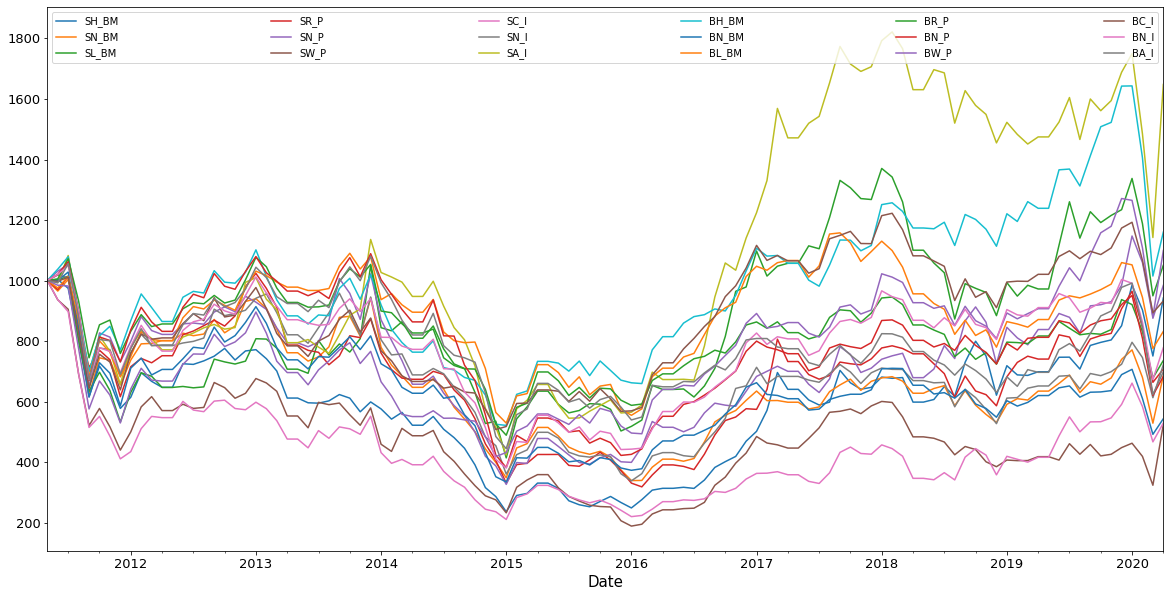

In [153]:
factors.plot(x='Date', y=['SH_BM', 'SN_BM', 'SL_BM', 'SR_P', 'SN_P', 'SW_P', 'SC_I',
       'SN_I', 'SA_I', 'BH_BM', 'BN_BM', 'BL_BM', 'BR_P', 'BN_P', 'BW_P',
       'BC_I', 'BN_I', 'BA_I'], figsize=(20, 10))
plt.legend(fontsize=20)
plt.legend(fontsize="x-large")
plt.legend(loc='upper left', mode = 'expand', ncol=6)
#plt.title('Динамика рыночных стоимостей портфелей в России', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.savefig('5FF Russia.png')

In [154]:
factors['SH_BM%'] = factors['SH_BM'].pct_change() * 100
factors['SN_BM%'] = factors['SN_BM'].pct_change() * 100
factors['SL_BM%'] = factors['SL_BM'].pct_change() * 100

factors['SR_P%'] = factors['SR_P'].pct_change() * 100
factors['SN_P%'] = factors['SN_P'].pct_change() * 100
factors['SW_P%'] = factors['SW_P'].pct_change() * 100

factors['SC_I%'] = factors['SC_I'].pct_change() * 100
factors['SN_I%'] = factors['SN_I'].pct_change() * 100
factors['SA_I%'] = factors['SA_I'].pct_change() * 100

factors['BH_BM%'] = factors['BH_BM'].pct_change() * 100
factors['BN_BM%'] = factors['BN_BM'].pct_change() * 100
factors['BL_BM%'] = factors['BL_BM'].pct_change() * 100

factors['BR_P%'] = factors['BR_P'].pct_change() * 100
factors['BN_P%'] = factors['BN_P'].pct_change() * 100
factors['BW_P%'] = factors['BW_P'].pct_change() * 100

factors['BC_I%'] = factors['BC_I'].pct_change() * 100
factors['BN_I%'] = factors['BN_I'].pct_change() * 100
factors['BA_I%'] = factors['BA_I'].pct_change() * 100

factors = factors.fillna(0)

factors

,Date,SH_BM,SN_BM,SL_BM,SR_P,SN_P,SW_P,SC_I,SN_I,SA_I,...,SA_I%,BH_BM%,BN_BM%,BL_BM%,BR_P%,BN_P%,BW_P%,BC_I%,BN_I%,BA_I%
0,2011-05-31,"1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000",...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2011-06-30,"1,003.609",965.109,"1,001.368",969.793,"1,030.636",936.147,936.836,"1,017.987",992.602,...,-0.740,3.741,-0.049,-2.460,0.527,2.006,-1.558,-0.274,1.987,-0.736
2,2011-07-31,974.068,"1,003.335","1,014.553","1,013.028","1,053.519",904.873,896.937,"1,009.708","1,082.579",...,9.065,3.956,2.855,3.858,6.605,4.090,-0.261,1.370,2.918,6.410
3,2011-08-31,804.709,836.139,799.213,856.226,887.823,690.714,690.967,851.156,891.502,...,-17.650,-16.596,-18.371,-13.953,-13.037,-15.537,-21.134,-18.359,-14.464,-16.702
4,2011-09-30,616.071,619.591,633.508,712.797,646.616,520.466,514.301,646.542,696.778,...,-21.842,-22.375,-26.765,-21.610,-20.109,-25.366,-25.697,-22.013,-25.055,-23.590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019-12-31,850.599,739.315,"1,234.128",906.852,984.019,447.622,590.556,723.335,"1,688.441",...,5.887,7.874,8.322,7.205,11.837,5.475,7.782,5.941,8.545,8.718
104,2020-01-31,985.339,770.650,"1,337.335",964.380,"1,147.112",462.097,660.784,795.827,"1,749.924",...,3.641,0.039,2.530,-0.710,-1.766,3.268,-0.480,1.630,-1.245,1.441
105,2020-02-29,902.487,679.449,"1,187.999",844.719,"1,059.376",418.528,583.250,745.218,"1,484.374",...,-15.175,-14.455,-13.687,-10.240,-9.728,-14.938,-12.410,-10.537,-13.005,-14.653
106,2020-03-31,750.427,528.333,949.343,663.489,881.290,323.196,466.605,612.636,"1,142.125",...,-23.057,-27.816,-19.375,-17.897,-18.421,-23.305,-21.008,-16.281,-21.975,-26.325


In [155]:
factors['SMB_BM'] = (factors['SH_BM%'] + factors['SN_BM%'] + factors['SL_BM%'])/3 - (factors['BH_BM%'] + factors['BN_BM%'] + factors['BL_BM%'])/3
factors['SMB_P'] = (factors['SR_P%'] + factors['SN_P%'] + factors['SW_P%'])/3 - (factors['BR_P%'] + factors['BN_P%'] + factors['BW_P%'])/3
factors['SMB_I'] = (factors['SC_I%'] + factors['SN_I%'] + factors['SA_I%'])/3 - (factors['BC_I%'] + factors['BN_I%'] + factors['BA_I%'])/3

In [156]:
factors['SMB'] = (factors['SMB_BM'] + factors['SMB_P'] + factors['SMB_I'])/3
factors['HML'] = (factors['SH_BM%'] + factors['BH_BM%'])/2 - (factors['SL_BM%'] + factors['BL_BM%'])/2
factors['RMW'] = (factors['SR_P%'] + factors['BR_P%'])/2 - (factors['SW_P%'] + factors['BW_P%'])/2
factors['CMA'] = (factors['SC_I%'] + factors['BC_I%'])/2 - (factors['SA_I%'] + factors['BA_I%'])/2

factors

,Date,SH_BM,SN_BM,SL_BM,SR_P,SN_P,SW_P,SC_I,SN_I,SA_I,...,BC_I%,BN_I%,BA_I%,SMB_BM,SMB_P,SMB_I,SMB,HML,RMW,CMA
0,2011-05-31,"1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000",...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2011-06-30,"1,003.609",965.109,"1,001.368",969.793,"1,030.636",936.147,936.836,"1,017.987",992.602,...,-0.274,1.987,-0.736,-1.408,-2.439,-2.078,-1.975,3.212,2.724,-2.557
2,2011-07-31,974.068,"1,003.335","1,014.553","1,013.028","1,053.519",904.873,896.937,"1,009.708","1,082.579",...,1.370,2.918,6.410,-2.778,-2.366,-2.235,-2.460,-2.081,7.333,-9.182
3,2011-08-31,804.709,836.139,799.213,856.226,887.823,690.714,690.967,851.156,891.502,...,-18.359,-14.464,-16.702,-2.118,-1.722,-2.264,-2.035,0.598,8.143,-3.486
4,2011-09-30,616.071,619.591,633.508,712.797,646.616,520.466,514.301,646.542,696.778,...,-22.013,-25.055,-23.590,0.225,0.868,-0.264,0.276,-1.736,6.742,-1.074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019-12-31,850.599,739.315,"1,234.128",906.852,984.019,447.622,590.556,723.335,"1,688.441",...,5.941,8.545,8.718,-2.302,-1.406,-1.864,-1.857,2.482,4.378,-0.241
104,2020-01-31,985.339,770.650,"1,337.335",964.380,"1,147.112",462.097,660.784,795.827,"1,749.924",...,1.630,-1.245,1.441,8.861,8.377,7.910,8.382,4.114,0.912,4.220
105,2020-02-29,902.487,679.449,"1,187.999",844.719,"1,059.376",418.528,583.250,745.218,"1,484.374",...,-10.537,-13.005,-14.653,2.325,2.531,1.642,2.166,-0.728,-0.149,3.779
106,2020-03-31,750.427,528.333,949.343,663.489,881.290,323.196,466.605,612.636,"1,142.125",...,-16.281,-21.975,-26.325,1.970,0.563,1.245,1.259,-3.339,1.955,6.551


In [157]:
factors.columns.values

array(['Date', 'SH_BM', 'SN_BM', 'SL_BM', 'SR_P', 'SN_P', 'SW_P', 'SC_I',
       'SN_I', 'SA_I', 'BH_BM', 'BN_BM', 'BL_BM', 'BR_P', 'BN_P', 'BW_P',
       'BC_I', 'BN_I', 'BA_I', 'SH_BM%', 'SN_BM%', 'SL_BM%', 'SR_P%',
       'SN_P%', 'SW_P%', 'SC_I%', 'SN_I%', 'SA_I%', 'BH_BM%', 'BN_BM%',
       'BL_BM%', 'BR_P%', 'BN_P%', 'BW_P%', 'BC_I%', 'BN_I%', 'BA_I%',
       'SMB_BM', 'SMB_P', 'SMB_I', 'SMB', 'HML', 'RMW', 'CMA'],
      dtype=object)

In [158]:
# factors.to_excel('5FF Russia.xlsx')

In [159]:
# Подтягиваем рыночную премию за риск

premium = pd.read_excel('Raw_Dataset_3.xlsx',  sheet_name='Market Factor Russia', header=0)
premium['Date'] = pd.to_datetime(premium['Date'], dayfirst=True)
premium

,Date,Risk Free Rate,Market Return,Market Premium
0,2010-02-28,2.575,-4.272,-6.847
1,2010-03-31,3.014,11.456,8.443
2,2010-04-30,0.128,0.023,-0.106
3,2010-05-31,-5.140,-11.969,-6.829
4,2010-06-30,-0.949,-3.267,-2.319
...,...,...,...,...
126,2020-08-31,-0.453,1.957,2.411
127,2020-09-30,-5.849,-6.363,-0.515
128,2020-10-31,-3.663,-9.496,-5.832
129,2020-11-30,8.053,20.192,12.140


In [160]:
model = pd.merge(factors[['Date', 'SMB', 'HML', 'RMW', 'CMA', 'SH_BM%', 'SN_BM%', 'SL_BM%', 'SR_P%',
       'SN_P%', 'SW_P%', 'SC_I%', 'SN_I%', 'SA_I%', 'BH_BM%', 'BN_BM%',
       'BL_BM%', 'BR_P%', 'BN_P%', 'BW_P%', 'BC_I%', 'BN_I%', 'BA_I%']],
                 premium[['Date', 'Market Premium', 'Risk Free Rate']], how='inner', on='Date')
model = model.rename(columns={'SH_BM%': 'SH_BM',
                              'SN_BM%': 'SN_BM',
                              'SL_BM%': 'SL_BM',
                              'SR_P%': 'SR_P',
                              'SN_P%': 'SN_P',
                              'SW_P%': 'SW_P',
                              'SC_I%': 'SC_I',
                              'SN_I%': 'SN_I',
                              'SA_I%': 'SA_I',
                              'BH_BM%': 'BH_BM', 
                              'BN_BM%': 'BN_BM',
                              'BL_BM%': 'BL_BM',
                              'BR_P%': 'BR_P',
                              'BN_P%': 'BN_P',
                              'BW_P%': 'BW_P',
                              'BC_I%': 'BC_I',
                              'BN_I%': 'BN_I',
                              'BA_I%': 'BA_I',
                              'Market Premium': 'MP'})

model

,Date,SMB,HML,RMW,CMA,SH_BM,SN_BM,SL_BM,SR_P,SN_P,...,BN_BM,BL_BM,BR_P,BN_P,BW_P,BC_I,BN_I,BA_I,MP,Risk Free Rate
0,2011-05-31,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-4.983,-1.842
1,2011-06-30,-1.975,3.212,2.724,-2.557,0.361,-3.489,0.137,-3.021,3.064,...,-0.049,-2.460,0.527,2.006,-1.558,-0.274,1.987,-0.736,0.386,0.573
2,2011-07-31,-2.460,-2.081,7.333,-9.182,-2.943,3.961,1.317,4.458,2.220,...,2.855,3.858,6.605,4.090,-0.261,1.370,2.918,6.410,-0.812,3.870
3,2011-08-31,-2.035,0.598,8.143,-3.486,-17.387,-16.664,-21.225,-15.479,-15.728,...,-18.371,-13.953,-13.037,-15.537,-21.134,-18.359,-14.464,-16.702,-7.999,-5.372
4,2011-09-30,0.276,-1.736,6.742,-1.074,-23.442,-25.898,-20.734,-16.751,-27.168,...,-26.765,-21.610,-20.109,-25.366,-25.697,-22.013,-25.055,-23.590,-9.225,-11.993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019-12-31,-1.857,2.482,4.378,-0.241,5.858,9.074,1.562,9.891,5.795,...,8.322,7.205,11.837,5.475,7.782,5.941,8.545,8.718,2.651,5.028
104,2020-01-31,8.382,4.114,0.912,4.220,15.841,4.238,8.363,6.344,16.574,...,2.530,-0.710,-1.766,3.268,-0.480,1.630,-1.245,1.441,-4.219,2.163
105,2020-02-29,2.166,-0.728,-0.149,3.779,-8.408,-11.834,-11.167,-12.408,-7.648,...,-13.687,-10.240,-9.728,-14.938,-12.410,-10.537,-13.005,-14.653,-10.101,-4.228
106,2020-03-31,1.259,-3.339,1.955,6.551,-16.849,-22.241,-20.089,-21.455,-16.810,...,-19.375,-17.897,-18.421,-23.305,-21.008,-16.281,-21.975,-26.325,-4.423,-17.524


In [161]:
# построение исходного портфеля

#all_p = data[['Date', 'RIC']]
#all_p

In [162]:
"""start_date = pd.to_datetime('31.05.2011', dayfirst=True)
portfolio = pd.DataFrame()

for i in range(10):
    one_year = prices[(prices['Date'] >= start_date + pd.to_timedelta(i, unit='y')) &
           (prices['Date'] < start_date + pd.to_timedelta(i+1, unit='y'))]
    
    portfolio_part = pd.merge(all_p[all_p['Date']==2010+i], one_year, how='left', on=['RIC'])
    del portfolio_part['Date_x']
    portfolio_part = portfolio_part.rename(columns={'Date_y': 'Date'})
    portfolio = portfolio.append(portfolio_part)"""

"start_date = pd.to_datetime('31.05.2011', dayfirst=True)\nportfolio = pd.DataFrame()\n\nfor i in range(10):\n    one_year = prices[(prices['Date'] >= start_date + pd.to_timedelta(i, unit='y')) &\n           (prices['Date'] < start_date + pd.to_timedelta(i+1, unit='y'))]\n    \n    portfolio_part = pd.merge(all_p[all_p['Date']==2010+i], one_year, how='left', on=['RIC'])\n    del portfolio_part['Date_x']\n    portfolio_part = portfolio_part.rename(columns={'Date_y': 'Date'})\n    portfolio = portfolio.append(portfolio_part)"

In [163]:
#portfolio_result = build_portfolio(portfolio)

In [164]:
"""portfolio_result['Return'] = portfolio_result['Amount'].pct_change() * 100
portfolio_result = portfolio_result.fillna(0)
portfolio_result = pd.merge(portfolio_result, premium[['Date', 'Risk Free Rate']], how='inner', on='Date')
portfolio_result['y_return'] = portfolio_result['Return'] - portfolio_result['Risk Free Rate']
portfolio_result = portfolio_result.rename(columns={'Amount': 'portfolio'})
portfolio_result"""

"portfolio_result['Return'] = portfolio_result['Amount'].pct_change() * 100\nportfolio_result = portfolio_result.fillna(0)\nportfolio_result = pd.merge(portfolio_result, premium[['Date', 'Risk Free Rate']], how='inner', on='Date')\nportfolio_result['y_return'] = portfolio_result['Return'] - portfolio_result['Risk Free Rate']\nportfolio_result = portfolio_result.rename(columns={'Amount': 'portfolio'})\nportfolio_result"

In [165]:
# CAPM

pd.options.display.float_format = '{:,.3f}'.format

def CAPM_OLS(p):
    X = model['MP'].values
    X = sm.add_constant(X)
    Y = np.array(p-model['Risk Free Rate'])

    regr = sm.OLS(Y, X).fit()

    result = {'portfolio': [p.name, 'p-value'],
              'alpha': [regr.params[0], regr.pvalues[0]],
              'beta': [regr.params[1], regr.pvalues[1]],
              'rsquared': [regr.rsquared, regr.rsquared]}
    
    result = pd.DataFrame(data=result)
    return result

In [166]:
model.columns.values

array(['Date', 'SMB', 'HML', 'RMW', 'CMA', 'SH_BM', 'SN_BM', 'SL_BM',
       'SR_P', 'SN_P', 'SW_P', 'SC_I', 'SN_I', 'SA_I', 'BH_BM', 'BN_BM',
       'BL_BM', 'BR_P', 'BN_P', 'BW_P', 'BC_I', 'BN_I', 'BA_I', 'MP',
       'Risk Free Rate'], dtype=object)

In [167]:
CAPM = pd.DataFrame()

CAPM = CAPM.append(CAPM_OLS(model['SH_BM']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['SN_BM']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['SL_BM']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['SR_P']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['SN_P']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['SW_P']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['SC_I']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['SN_I']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['SA_I']), ignore_index=True)

CAPM = CAPM.append(CAPM_OLS(model['BH_BM']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['BN_BM']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['BL_BM']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['BR_P']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['BN_P']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['BW_P']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['BC_I']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['BN_I']), ignore_index=True)
CAPM = CAPM.append(CAPM_OLS(model['BA_I']), ignore_index=True)

CAPM

,portfolio,alpha,beta,rsquared
0,SH_BM,0.733,0.484,0.120
1,p-value,0.222,0.000,0.120
2,SN_BM,0.314,0.758,0.326
3,p-value,0.529,0.000,0.326
4,SL_BM,0.832,0.664,0.163
5,p-value,0.227,0.000,0.163
6,SR_P,0.390,0.508,0.146
7,p-value,0.487,0.000,0.146
8,SN_P,0.848,0.613,0.193
9,p-value,0.140,0.000,0.193


In [168]:
# 5FF


def FF5_OLS(p):
    X = model[['MP', 'SMB', 'HML', 'RMW', 'CMA']].values
    X = sm.add_constant(X)
    Y = np.array(p-model['Risk Free Rate'])

    regr = sm.OLS(Y, X).fit()

    result = {'portfolio': [p.name, 'p-value'],
              'alpha': [regr.params[0], regr.pvalues[0]],
              'MP': [regr.params[1], regr.pvalues[1]],
              'SMB': [regr.params[2], regr.pvalues[2]],
              'HML': [regr.params[3], regr.pvalues[3]],
              'RMW': [regr.params[4], regr.pvalues[4]],
              'CMA': [regr.params[5], regr.pvalues[5]],
              'rsquared': [regr.rsquared, regr.rsquared]}
    
    result = pd.DataFrame(data=result)
    return result

In [169]:
FF5 = pd.DataFrame()

FF5 = FF5.append(FF5_OLS(model['SH_BM']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['SN_BM']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['SL_BM']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['SR_P']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['SN_P']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['SW_P']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['SC_I']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['SN_I']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['SA_I']), ignore_index=True)

FF5 = FF5.append(FF5_OLS(model['BH_BM']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['BN_BM']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['BL_BM']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['BR_P']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['BN_P']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['BW_P']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['BC_I']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['BN_I']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['BA_I']), ignore_index=True)

FF5 = FF5.append(FF5_OLS(model['MP']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['SMB']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['HML']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['RMW']), ignore_index=True)
FF5 = FF5.append(FF5_OLS(model['CMA']), ignore_index=True)

FF5

,portfolio,alpha,MP,SMB,HML,RMW,CMA,rsquared
0,SH_BM,0.479,0.683,1.057,0.648,0.071,0.083,0.683
1,p-value,0.195,0.000,0.000,0.000,0.353,0.313,0.683
2,SN_BM,0.103,0.855,0.634,-0.113,-0.151,-0.128,0.569
3,p-value,0.801,0.000,0.000,0.267,0.078,0.159,0.569
4,SL_BM,0.748,0.832,1.027,-0.917,-0.079,0.139,0.705
5,p-value,0.076,0.000,0.000,0.000,0.367,0.138,0.705
6,SR_P,0.267,0.799,0.849,-0.064,0.610,-0.008,0.493
7,p-value,0.548,0.000,0.000,0.564,0.000,0.938,0.493
8,SN_P,0.647,0.740,0.779,0.339,-0.056,0.029,0.482
9,p-value,0.171,0.000,0.000,0.004,0.568,0.783,0.482


In [170]:
CAPM.to_excel('New Models\FF5 CAPM Russia.xlsx')
FF5.to_excel('New Models\FF5 Russia.xlsx')